In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [24]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

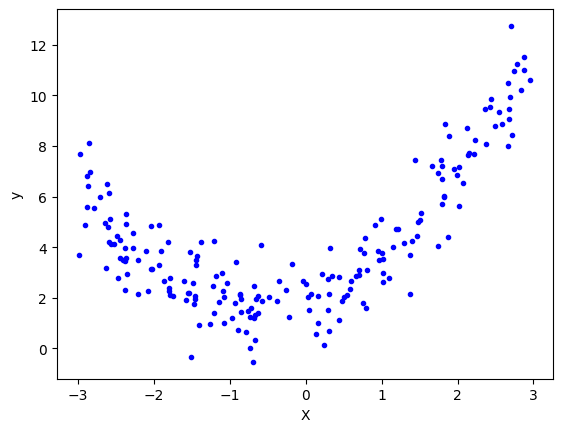

In [25]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.3178171967807871

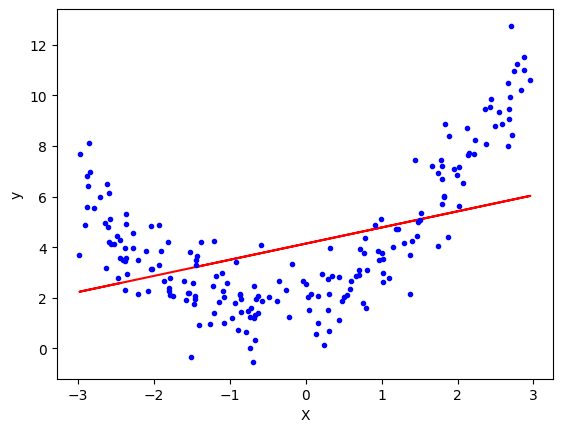

In [30]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [31]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [32]:
print(X_train[0])
print(X_train_trans[0])

[-1.40489959]
[ 1.         -1.40489959  1.97374286]


In [33]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test_trans)

r2_score(y_test,y_pred)

0.8999188438364493

In [35]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.90635483 0.7902942 ]]
[1.86469739]


In [36]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

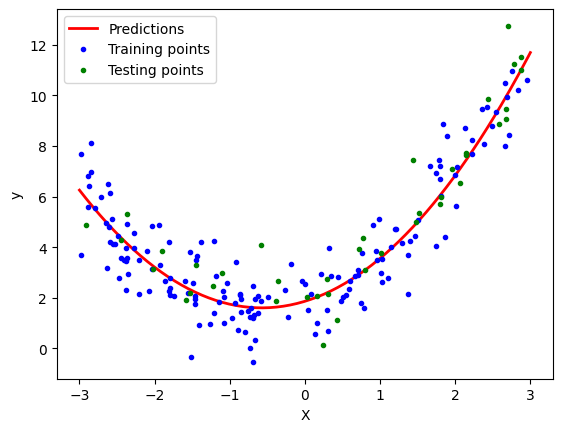

In [37]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()